In [1]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
from scipy.stats import shapiro

In [2]:
data8 = pd.read_csv('../ficheiros/ExemploMontegomery.csv', delimiter=';', decimal=',')
data8.columns = ['obs_num', 'surface_finish', 'RPM', 'type_cutting']
data8['type_cutting'] = data8['type_cutting'].map({302: 0, 416: 1})

## a)
...


## b)

In [3]:
X = data8[['RPM', 'type_cutting']]
Xc = sm.add_constant(X)
Y = data8['surface_finish']
modelo8 = sm.OLS(Y, Xc)
res8 = modelo8.fit()

In [4]:
print(res8.params)

const           14.276196
RPM              0.141150
type_cutting   -13.280195
dtype: float64


Tem-se deste modo,
$\beta_0$ = 14,2762, $\beta_1$ = 0.1411, $\beta_2$ = -13.2802
Modelo:
Y = 14.2762 + 0.1411 x $X_1$ - 13.2802 x $X_2$

## c) 

In [5]:
print('Coeficiente de determinação ajustado:',
      res8.rsquared_adj)
#
f_statistic_p_value = res8.f_pvalue
print("P-value da estatistica - F:", f_statistic_p_value)

Coeficiente de determinação ajustado: 0.9914583302250195
P-value da estatistica - F: 1.017475197358863e-18


P-values para os coeficientes de regressão:
const             2.944575e-06
RPM               1.130190e-11
type_cutting      6.243924e-19
dtype: float64

* Os coeficientes de regressão são todos significativos (valores de prova menores que).

## d)
### homocedasticidade

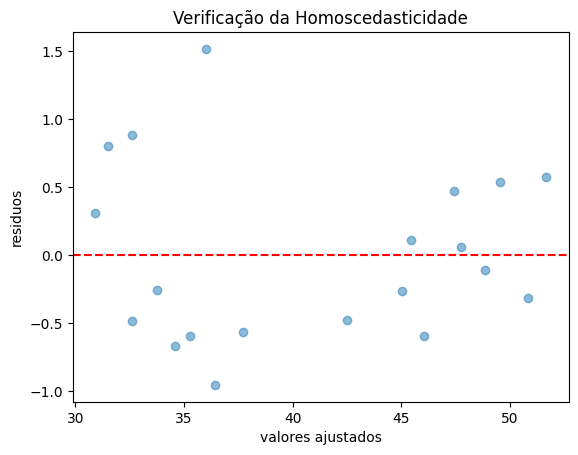

In [6]:
val_ajust8 = res8.fittedvalues
residuos8 = res8.resid
plt.scatter(val_ajust8, residuos8, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Verificação da Homoscedasticidade')
plt.xlabel('valores ajustados')
plt.ylabel('residuos')
plt.show()

### Normalidade dos resíduos


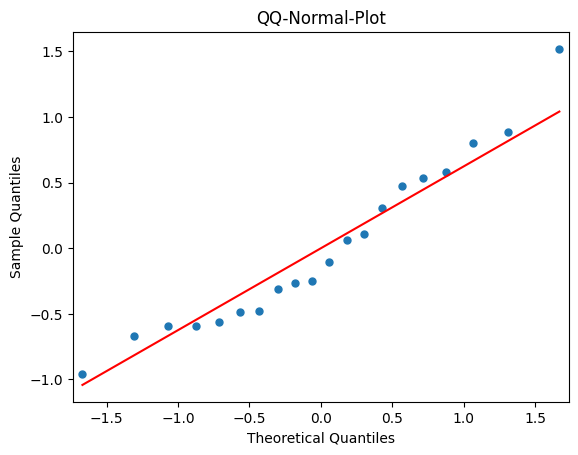

Shapiro p-value:
0.29576104846508494


In [7]:
sm.qqplot(residuos8, line='s', markersize=5)
plt.title('QQ-Normal-Plot')
plt.show()
st8, pv8 = shapiro(residuos8)
print('Shapiro p-value:')
print(pv8)

### Independência dos resíduos


In [8]:
durbinWatson8 = durbin_watson(residuos8)


### Conclusão
Verificam-se todos os pressupostos relativos aos resíduos.

## e)
### Estudo da multicolinearidade: Fator de inflação de variância - VIF

In [9]:
vif_res = pd.DataFrame()
vif_res["variaveis"] = X.columns
vif_res["VIF"] = [variance_inflation_factor(X.values, i)
                  for i in range(len(X.columns))]
print(vif_res)

      variaveis       VIF
0           RPM  1.983642
1  type_cutting  1.983642


Ambas as variáveis têm VIF próximas inferiores a , não há multicolinearidade, e
consequentemente devem ser incluidas no modelo